In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation
import time
from scipy.stats import rayleigh


In [287]:
# df = pd.read_csv("outfile.txt", sep=",", nrows = 100*10000, usecols = [0,1,3,4], header=None)
df = pd.read_csv("outfile.txt", sep=",", nrows = 5000*10000, usecols = [0,1,3,4], header=None)
A = df.astype(float).to_numpy();
data =[]
for i in range(int(len(A)/10000)):
    x  = A[i*10000:(i+1)*10000,0]
    y  = A[i*10000:(i+1)*10000,1]
    vx = A[i*10000:(i+1)*10000,2]
    vy = A[i*10000:(i+1)*10000,3]
    vmag = [np.sqrt(vx[i]**2+vy[i]**2) for i in range(10000)]
    data.append(np.transpose([x,y,vmag]))

data = np.array(data)

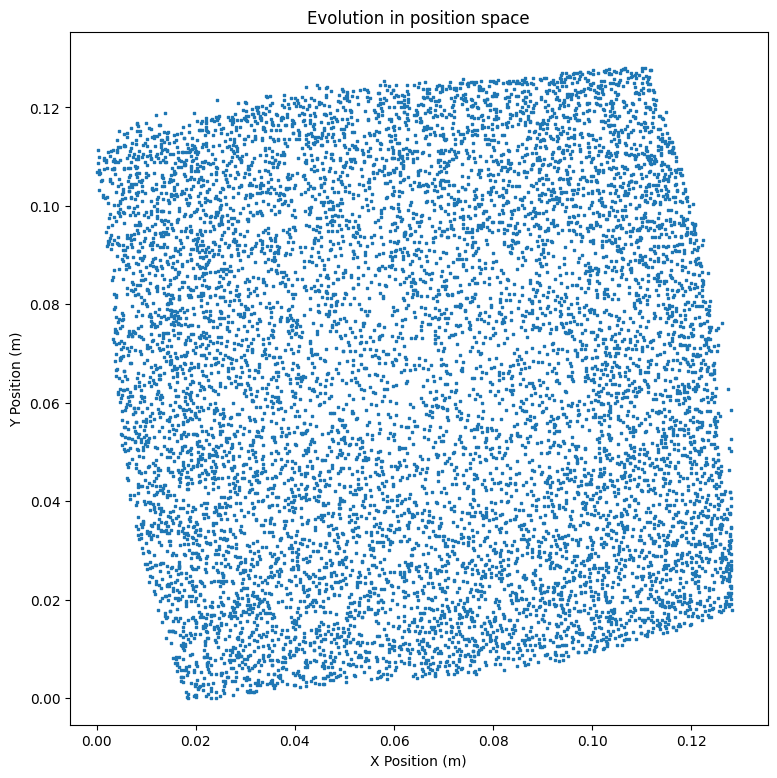

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(9,9))
# sc = ax.scatter(data[0, 0, :], data[0, 1, :])  # Initial scatter plot
sc = ax.scatter(data[0, :, 0], data[0, :, 1], marker=',', s=1)  # Initial scatter plot
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_title("Evolution in position space")
# Animation function
def animate(i):
    sc.set_offsets(data[i])
    return sc

# Create animation
# ani = FuncAnimation(fig, animate, frames=len(data))
ani = FuncAnimation(fig, animate, blit=True)

# Save as GIF
ani.save('animation.gif', writer='imagemagick', fps=6)


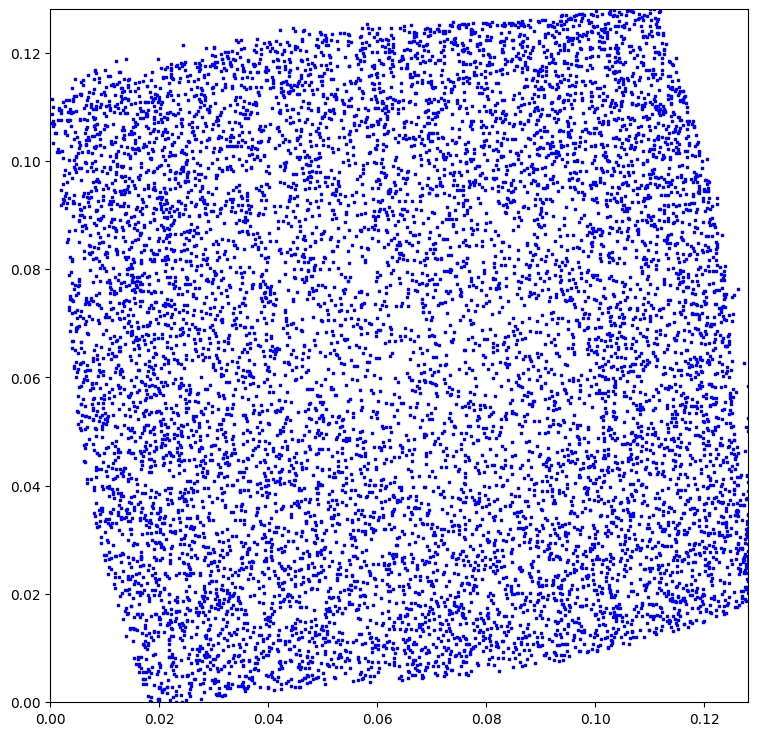

In [ ]:
df = pd.read_csv("outfile.txt", sep=",",usecols = [0,1,3,4], header=None)
A = df.astype(float).to_numpy();

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1, 1, 1) 

# Define and update plot

for i in range(100):
    x = A[i*10000:(i+1)*10000,0];
    y = A[i*10000:(i+1)*10000,1];
    ax.cla()
    ax.set_xlim([-0.000, 0.128])
    ax.set_ylim([-0.000, 0.128])
    ax.scatter(x, y, c='blue', marker=',', s=1)
    display(fig)    
    clear_output(wait = True)
    plt.pause(0.01)

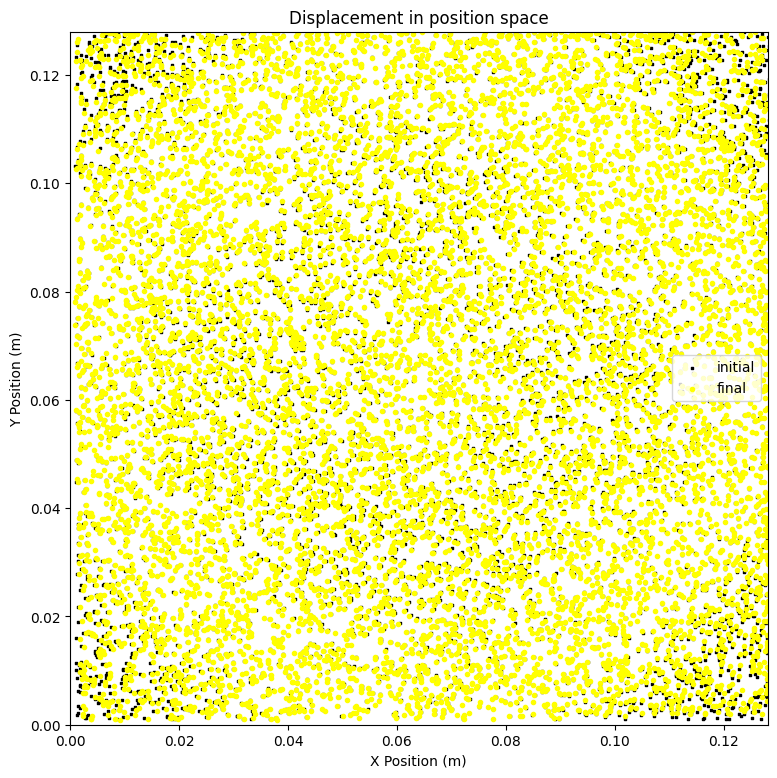

In [402]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1, 1, 1) 
ax.cla();
ax.scatter(A[:10000,0],A[:10000,1], marker=',', color = "black", s = 1, label = "initial");
ax.scatter(A[99*10000:100*10000,0],A[99*10000:100*10000,1], marker='.', color = "yellow", label = "final")
ax.set_xlim([-0.000, 0.128])
ax.set_ylim([-0.000, 0.128])
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_title("Displacement in position space")
plt.legend()

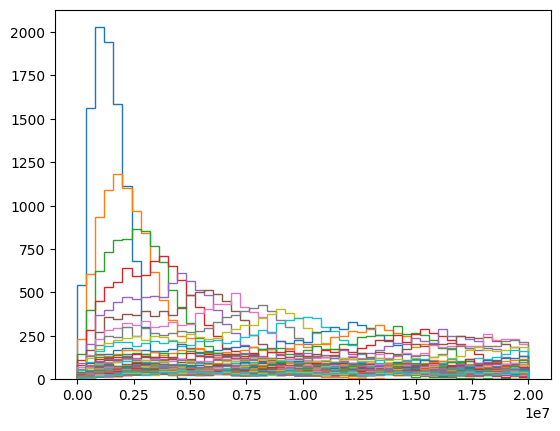

In [250]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

# Define and update plot

for i in range(100):
    vx = A[i*10000:(i+1)*10000,2];
    vy = A[i*10000:(i+1)*10000,3];
    vmag = [np.sqrt(vx[i]**2+vy[i]**2) for i in range(10000)]
    ax.hist(vmag,50,range = (0,2e7),histtype="step")
    # ax.hist(vmag,histtype="step")
    display(fig)    
    clear_output(wait = True)
    plt.pause(0.03)

(array([ 57., 132., 181., 234., 343., 429., 460., 513., 524., 576., 517.,
        577., 554., 499., 474., 484., 414., 421., 375., 327., 290., 272.,
        228., 185., 177., 180., 106.,  78.,  70.,  74.,  49.,  49.,  39.,
         32.,  12.,  21.,   5.,  12.,  10.,   3.,   6.,   2.,   3.,   3.,
          0.,   0.,   1.,   1.,   0.,   1.]),
 array([1.27518356e+03, 1.07839158e+05, 2.14403133e+05, 3.20967108e+05,
        4.27531083e+05, 5.34095057e+05, 6.40659032e+05, 7.47223007e+05,
        8.53786982e+05, 9.60350956e+05, 1.06691493e+06, 1.17347891e+06,
        1.28004288e+06, 1.38660686e+06, 1.49317083e+06, 1.59973481e+06,
        1.70629878e+06, 1.81286275e+06, 1.91942673e+06, 2.02599070e+06,
        2.13255468e+06, 2.23911865e+06, 2.34568263e+06, 2.45224660e+06,
        2.55881058e+06, 2.66537455e+06, 2.77193853e+06, 2.87850250e+06,
        2.98506648e+06, 3.09163045e+06, 3.19819443e+06, 3.30475840e+06,
        3.41132238e+06, 3.51788635e+06, 3.62445033e+06, 3.73101430e+06,
        3.

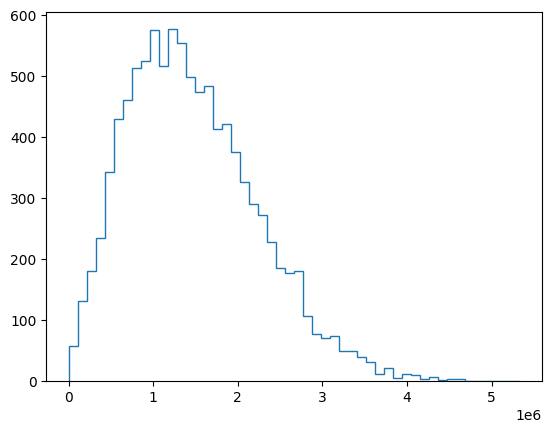

In [253]:
    i = 0
    vx = A[10000*i:10000*(i+1),2];
    vy = A[10000*i:10000*(i+1),3];
    vmag = [np.sqrt(vx[i]**2+vy[i]**2) for i in range(10000)]
    plt.hist(vmag,50,histtype="step")

In [142]:
from scipy.stats import rayleigh
# data = rayleigh.rvs(scale=2, size=1000) 

param = rayleigh.fit(vmag)  # Fit the Rayleigh distribution to the data
# print("Fitted scale parameter (σ):", param[1])  # param[0] is the location (usually zero)

# vx = A[10000*i:10000*(i+1),2];
# vy = A[10000*i:10000*(i+1),3];

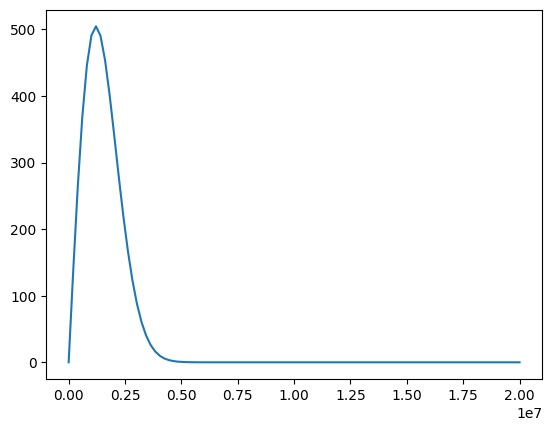

In [371]:
# round(param[1]**2*9.10938356e-31/1.38064852e-23,-3)
# len(data[i,:,2])
# len(data[:,1,2])
# np.linspace(0,2e7, 10)-param[0]
# T = int(round(param[1]**2*9.10938356e-31/1.38064852e-23,-3)/1000)

# xx = np.linspace(0,2, 100)
# pp = rayleigh.pdf(xx,1)
# plt.plot(xx-param[0], pp, 'k', linewidth=2, label=f'Fit Temperature = {T} kilo-Kelvin')
# rayleigh.pdf(xx,param[1])*10000
# param[1]
# xx = np.linspace(0,2e7, 100)
# param = rayleigh.fit(h_data[5, :])
pp = rayleigh.pdf(xx,param[0],param[1])*1e9
plt.plot(xx, pp)
# np.sum(rayleigh.pdf(xx,param[0],param[1]/5)*10000)
# len(h_data[4])
# rayleigh.pdf(xx,param[0],param[1]/8)*10000
# params[1]

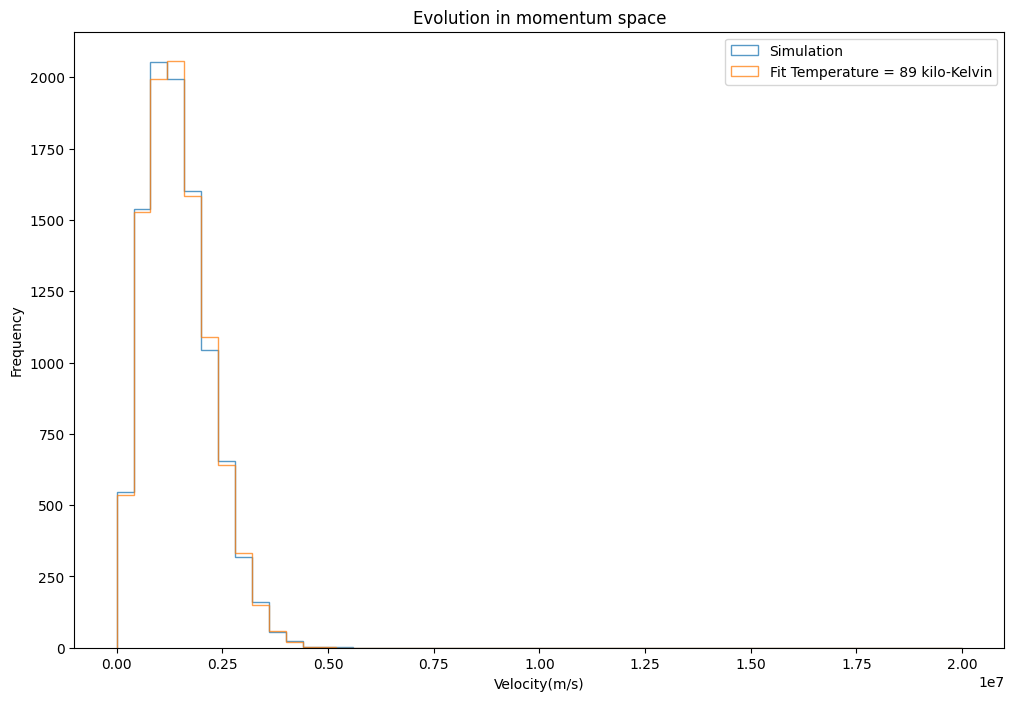

In [365]:
fig, ax = plt.subplots(figsize=(12,8))
# h_data = data[:, :,2]
counts, bins, patches = ax.hist(h_data[0,:],50,color="b", range = (0,2e7),histtype="step")
def animate(i):
    ax.clear()
    ax.hist(h_data[i,:], histtype = "step", bins=bins, alpha=0.75, label = "Simulation")
    param = rayleigh.fit(h_data[i, :])
    fit = rayleigh.rvs(scale=param[1], size=10000)+param[0]
    T = int(round(param[1]**2*9.10938356e-31/1.38064852e-23,-3)/1000)
    ax.hist(fit, histtype = "step", bins=bins, alpha=0.75, label = f'Fit Temperature = {T} kilo-Kelvin')
    xx = np.linspace(0,2e7, 100)
    # pp = rayleigh.pdf(xx-param[0],param[1])*10000
    # rayleigh.pdf(xx,param[0],param[1])*10000
    # plt.plot(xx, pp, color = 'tab:orange', label=f'Fit Temperature = {T} kilo-Kelvin')
    ax.set_xlabel("Velocity(m/s)")
    ax.set_ylabel("Frequency")
    # ax.text(0.9,0.9,f"T = {T} kilo Kelvin")
    ax.legend()
    ax.set_title("Evolution in momentum space")
    return patches,

ani = FuncAnimation(fig, animate)
ani.save('hist_animation.gif', writer='imagemagick', fps=6)

In [324]:
# data = rayleigh.rvs(scale=param[1], size=10000)+param[0]
# plt.hist(data,50,histtype="step")

ValueError: x and y must have same first dimension, but have shapes (4502,) and (1000,)

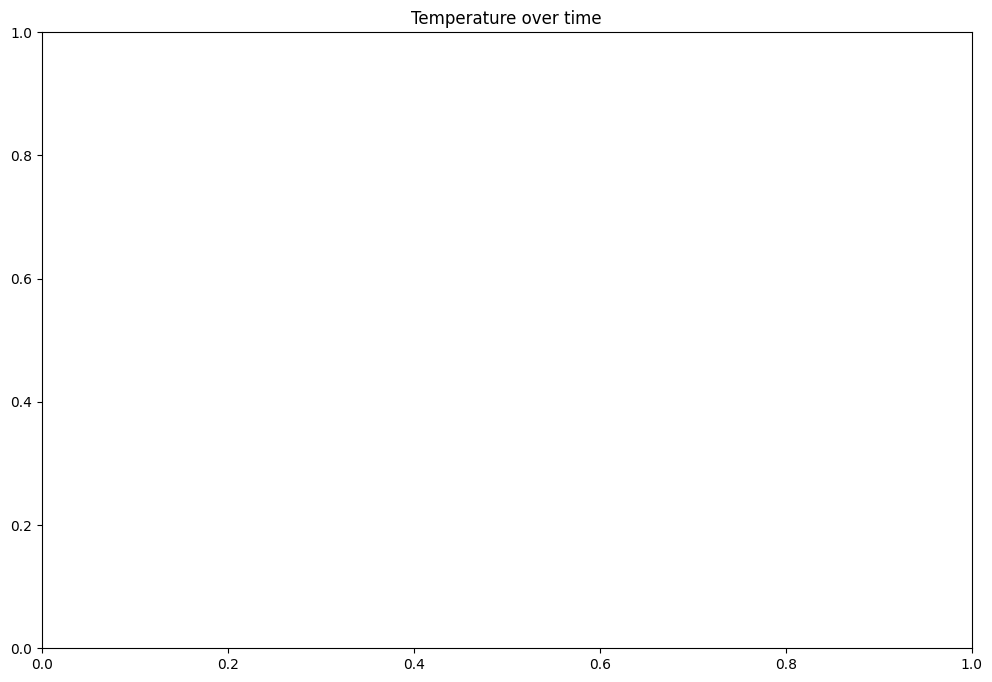

In [397]:
Ts = []
length = len(h_data)
for i in range(1000):
    print(f"{i}/{length}", end='\r')
    # try:
    param = rayleigh.fit(h_data[i, :])
    fit = rayleigh.rvs(scale=param[1], size=10000)+param[0]
    T = int(round(param[1]**2*9.10938356e-31/1.38064852e-23,-3)/1000)
    Ts.append(T)
    # except:
        # continue
plt.figure(figsize = (12,8))
plt.title("Temperature over time")
plt.plot(np.arange(length),Ts)
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (kK)')
plt.savefig("tempEvo.png")

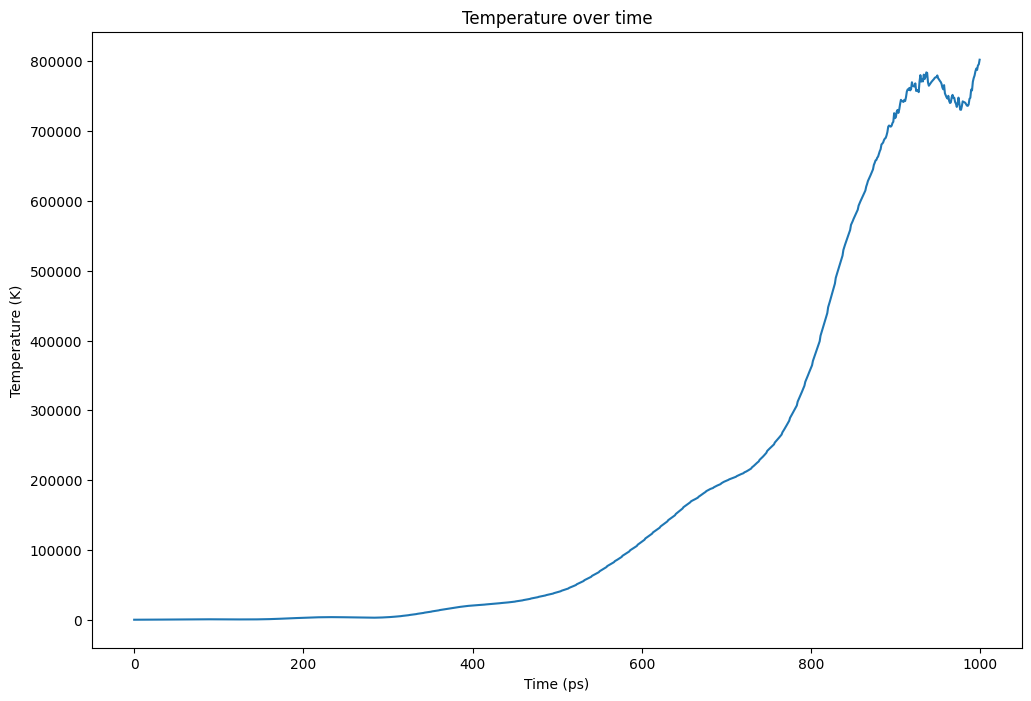

In [399]:
plt.figure(figsize = (12,8))
plt.title("Temperature over time")
plt.plot(np.arange(1000),Ts)
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.savefig("tempEvo.png")

In [393]:
len(Ts)
Ts

[89,
 90,
 91,
 92,
 93,
 95,
 98,
 99,
 102,
 105,
 113,
 117,
 121,
 126,
 130,
 136,
 141,
 146,
 152,
 166,
 172,
 179,
 186,
 194,
 202,
 210,
 218,
 227,
 244,
 253,
 262,
 271,
 281,
 291,
 301,
 311,
 321,
 341,
 352,
 362,
 372,
 383,
 393,
 404,
 415,
 426,
 446,
 457,
 467,
 476,
 486,
 496,
 505,
 514,
 524,
 542,
 551,
 560,
 568,
 577,
 585,
 593,
 601,
 609,
 623,
 630,
 637,
 644,
 650,
 655,
 661,
 665,
 670,
 679,
 682,
 686,
 689,
 692,
 695,
 697,
 699,
 700,
 702,
 703,
 703,
 703,
 702,
 701,
 700,
 698,
 697,
 691,
 688,
 685,
 681,
 677,
 673,
 669,
 665,
 660,
 650,
 644,
 639,
 633,
 627,
 622,
 616,
 610,
 604,
 593,
 586,
 580,
 574,
 568,
 562,
 556,
 550,
 544,
 533,
 527,
 522,
 517,
 512,
 508,
 504,
 501,
 498,
 493,
 492,
 491,
 490,
 490,
 490,
 491,
 493,
 495,
 501,
 505,
 511,
 517,
 525,
 534,
 543,
 554,
 564,
 590,
 604,
 620,
 637,
 655,
 674,
 694,
 715,
 737,
 784,
 808,
 835,
 862,
 891,
 920,
 950,
 981,
 1013,
 1081,
 1116,
 1153,
 1190,
 